In [2]:
import sqlalchemy as sa
import pandas as pd

In [4]:
from sqlalchemy import create_engine
engine = sa.create_engine('postgresql://localhost:5432/sql_challenge')
connection = engine.connect()

In [5]:
employee_df = pd.read_sql_table('employees', engine)
employee_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [6]:
employee_df = employee_df.rename(columns={'emp_title_id' : 'title_id'})
employee_df

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [7]:
salary_df = pd.read_sql_table('salaries', engine)
salary_df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [8]:
title_df = pd.read_sql_table('titles', engine)
title_df

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [9]:
emps_sals_df = pd.merge(employee_df, salary_df, on="emp_no")
emps_sals_df = pd.merge(emps_sals_df , title_df, on="title_id")

In [10]:
emps_sals_df

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,72446,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,71148,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,60026,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,40000,Manager


In [11]:
from matplotlib import pyplot as plt
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
from scipy.stats import sem
from scipy.stats import linregress

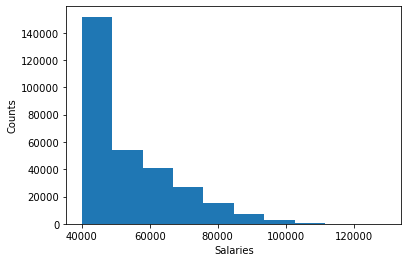

NormaltestResult(statistic=42673.14479918549, pvalue=0.0)


In [12]:
monies = emps_sals_df['salary']
plt.hist(monies)
plt.xlabel('Salaries')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(monies))

In [16]:
title_salaries_df = emps_sals_df[['title', 'salary']]
title_salaries_df = title_salaries_df.groupby('title').mean()
title_salaries_df

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


<AxesSubplot:xlabel='title'>

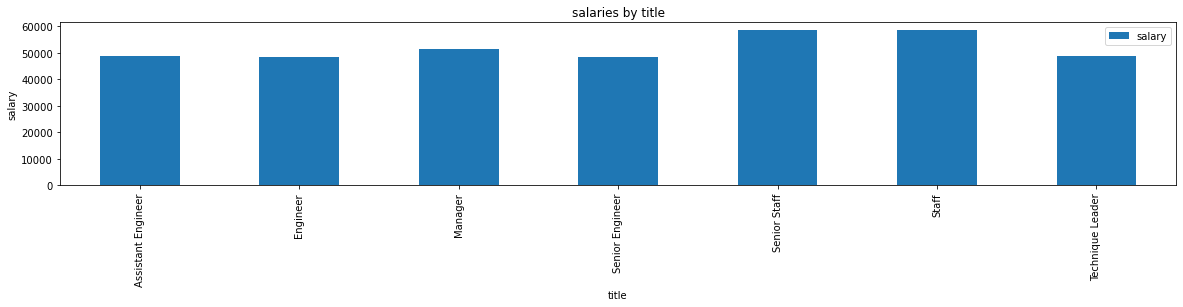

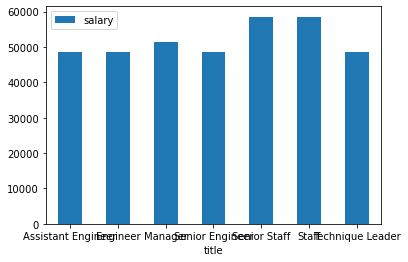

In [17]:
title_salaries_df.plot(kind="bar",figsize=(20,3),)
y = title_salaries_df["salary"]
plt.title("salaries by title")
plt.ylabel("salary")
plt.xlabel("title")
title_salaries_df.plot.bar(rot=0)